# Video Game Releases Per Year: Quick Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Reading in the data
df = pd.read_csv('games.csv')
df.head(5)

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [8]:
# Filtering data relevant for analysis
df1 = df.filter(items=['Title', 'Release Date'])
df1.head(5)

,Title,Release Date
0,Elden Ring,"Feb 25, 2022"
1,Hades,"Dec 10, 2019"
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017"
3,Undertale,"Sep 15, 2015"
4,Hollow Knight,"Feb 24, 2017"


## Data Cleaning

In [14]:
# Data Cleaning and Preparation
df1['Release Date'] = df1['Release Date'].str.replace('"', '') 

In [15]:
# Extracting year from the 'Release Date'
def extract_year(date_string):
    try:
        return pd.to_datetime(date_string, format='%b %d, %Y').year
    except (ValueError, TypeError):
        return None

In [16]:
# Applying the function to create 'Release Year' column
df1['Release Year'] = df1['Release Date'].apply(extract_year)

In [18]:
# Checking to see if Release Year was created successfully
df1.head(5)

,Title,Release Date,Release Year
0,Elden Ring,"Feb 25, 2022",2022.0
1,Hades,"Dec 10, 2019",2019.0
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017",2017.0
3,Undertale,"Sep 15, 2015",2015.0
4,Hollow Knight,"Feb 24, 2017",2017.0


In [19]:
# Checking for NULL values
df1.isnull().sum()

Title           0
Release Date    0
Release Year    3
dtype: int64

In [22]:
# Dropping NULL values in 'Release Year'
df1.dropna(subset=['Release Year'], inplace=True)

In [24]:
# Converting 'Release Year' to integer type from float
df1['Release Year'] = df1['Release Year'].astype(int)

In [26]:
# Counting games released per year
games_per_year = df1['Release Year'].value_counts().sort_index()

## Plotting the data

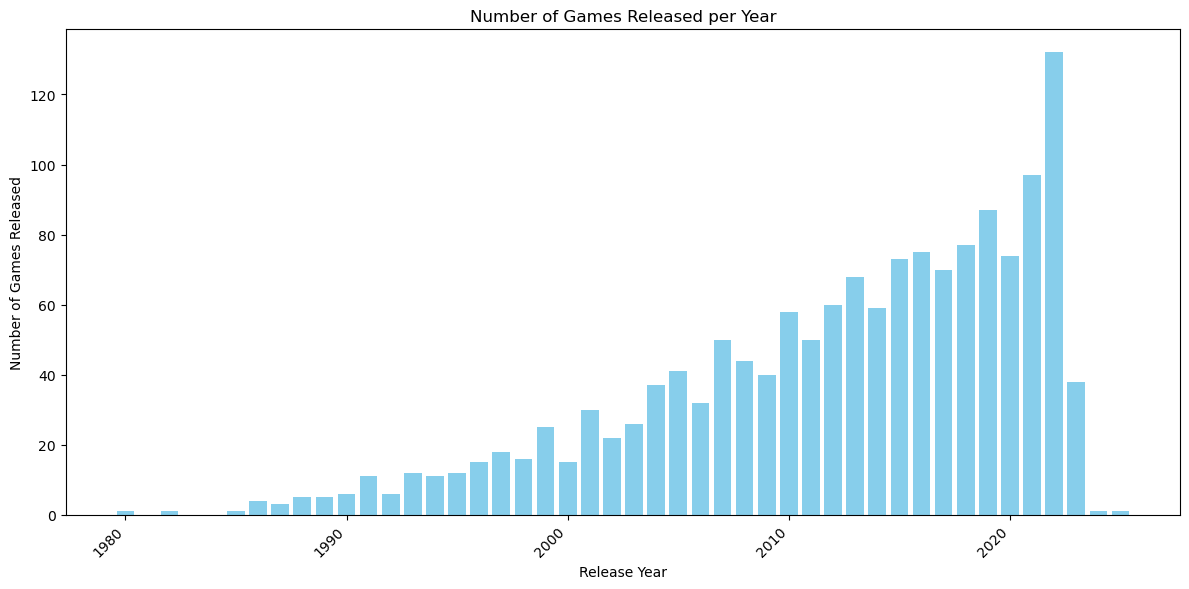

In [27]:
# Plotting data via bar graph using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.title("Number of Games Released per Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

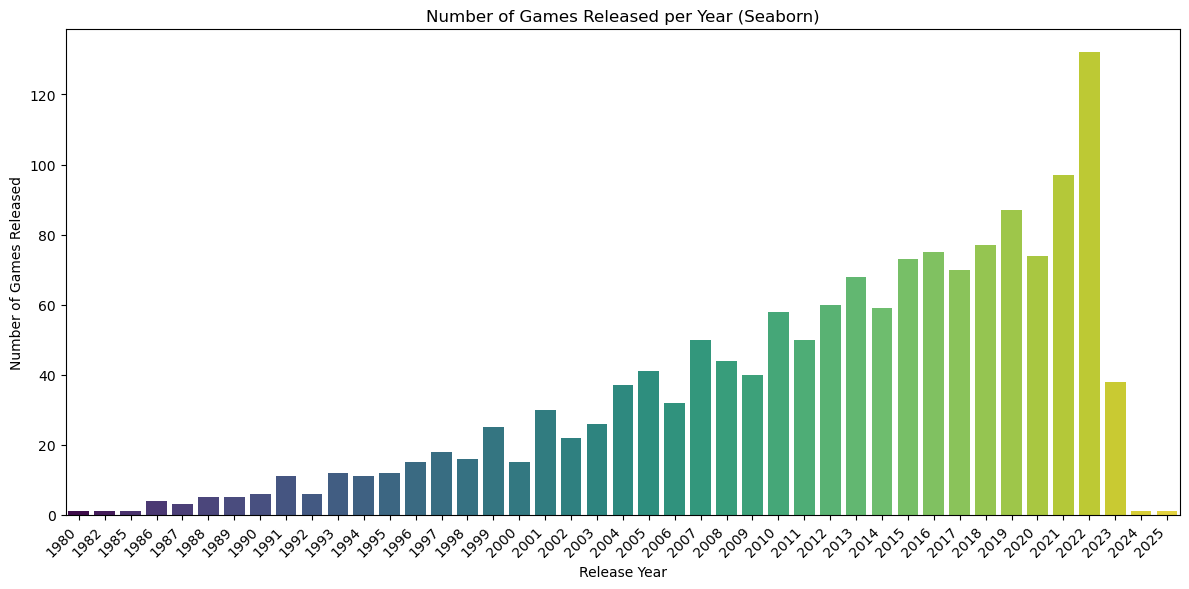

In [31]:
# Plotting the data using seasborn for higher detail
plt.figure(figsize=(12, 6))
sns.countplot(x='Release Year', data=df1, palette='viridis', hue='Release Year', legend=False)
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.title("Number of Games Released per Year (Seaborn)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The year that had the highest number of video game releases was 2022 with well over 120 titles.